In [4]:
import math
import numpy as np
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# this will make plots a little bit prettier
sns.set(style='darkgrid')
sns.set_context('talk')

# The Normal Distribution

## Solving the Fuse Problem

In [3]:
mean = 20.6
std_dev = 1.62

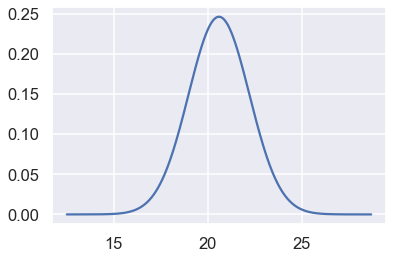

In [18]:
# plotting normal distribution with given parameters
x = np.linspace(mean - 5*std_dev, mean + 5*std_dev, 1000)
plt.plot(x, norm.pdf(x, mean, std_dev))

In [29]:
# calculating PDF for values between 10 and 18 as in the book
z = [10, 18]
norm.cdf(z, loc=mean, scale=std_dev)[1] - norm.cdf(z, loc=mean, scale=std_dev)[0]

0.054253694965280576

### 1. What is the probability of observing a value five sigma greater than the mean or more?

In [30]:
mu = 0
sigma = 1
x = [5, 100]   # 5 or more standard deviations
norm.cdf(x, loc=mu, scale=sigma)[1] - norm.cdf(x, loc=mu, scale=sigma)[0]

2.866515719235352e-07

### 2. A fever is any temperature greater than 100.4 degrees Fahrenheit. Given the following measurements, what is the probability that the patient has a fever?

### 100.0, 99.8, 101.0, 100.5, 99.7

In [37]:
obs = np.array([100.0, 99.8, 101.0, 100.5, 99.7])
mu = obs.mean()
sigma = obs.std()
x = [100.4, 200]

In [38]:
norm.cdf(x, loc=mu, scale=sigma)[1] - norm.cdf(x, loc=mu, scale=sigma)[0]

0.3402820504876537

### 3. Suppose in Chapter 11 we tried to measure the depth of a well by timing coin drops and got the following values: 2.5, 3, 3.5, 4, 2
### The distance an object falls can be calculated (in meters) with the following formula: distance = 1/2 × G × 𝐭𝐢𝐦𝐞𝟐 where G is 9.8 m/s/s. What is the probability that the well is over 500 meters deep?


In [39]:
# setting up function that will calculate distance based on time
def calc_distance(time, G=9.8):
    distance = 0.5 * G * time**2
    return distance

In [71]:
values = np.array([2.5, 3, 3.5, 4, 2])
distances = []
for val in values:
    d = calc_distance(val)
    distances.append(d)

In [73]:
distances = np.array([distances])

In [76]:
# manually checking what time do we need for 500 meters deep well using previous function
x = calc_distance(10.10161)

In [83]:
x = [10.10161, 200]
mu = values.mean()
sigma = values.std()

In [84]:
norm.cdf(x, loc=mu, scale=sigma)[1] - norm.cdf(x, loc=mu, scale=sigma)[0]

0.0

### 4. What is the probability there is no well (i.e., the well is really 0 meters deep)? You’ll notice that probability is higher than you might expect, given your observation that there is a well. There are two good explanations for this probability being higher than it should be. The first is that the normal distribution is a poor model for our measurements; the second is that, when making up numbers for an example, I chose values that you likely wouldn’t see in real life. Which is more likely to you?

In [90]:
x =[-1, 0]
norm.cdf(x, loc=mu, scale=sigma)[1] - norm.cdf(x, loc=mu, scale=sigma)[0]

1.1037539870342583e-05